# Clasificacion de calidad de sueño


smv o k-nearest

In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_iris
# import graphviz
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('student_sleep_patterns.csv')
data.sample(5)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
481,482,23,Female,1st Year,8.1,1.2,2.0,5,37,4,3.66,4.60,8.66,10.74
26,27,23,Male,4th Year,5.0,5.8,3.8,0,53,4,6.08,15.76,6.76,9.94
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
34,35,23,Other,3rd Year,6.6,7.5,1.5,1,56,9,3.91,17.22,6.78,9.48
331,332,18,Male,1st Year,4.1,5.4,3.2,1,107,5,11.23,9.10,7.50,9.88


In [3]:
dataSleep = data.drop(columns='Student_ID')
dataSleep.tail()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
495,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20
499,21,Male,3rd Year,7.9,11.6,1.0,0,86,1,7.54,14.12,7.01,9.19


In [4]:
Genero = []
for f in dataSleep['Gender']:
    if f == 'Male':
        Genero.append(1)
    else:
        Genero.append(0)
dataSleep['Gender'] = Genero
dataSleep.head()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,24,0,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,21,1,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,22,1,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,24,0,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,20,1,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [5]:
universityYear = []
for f in dataSleep['University_Year']:
    if f == '1st Year':
        universityYear.append(0)
    elif f == '2nd Year':
        universityYear.append(1)
    elif f == '3rd Year':
        universityYear.append(2)
    else:
        universityYear.append(3)
dataSleep['University_Year'] = universityYear
dataSleep.head()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,24,0,1,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,21,1,0,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,22,1,3,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,24,0,3,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,20,1,3,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [6]:
x_train,x_test,y_train,y_test=train_test_split(dataSleep.drop(columns='Sleep_Quality'), dataSleep['Sleep_Quality'], test_size=0.3, random_state=2023)

In [7]:
clf = svm.SVC() # kernel default 'rbf'
clf.fit(x_train, y_train)

SVC()

In [8]:
clf.score(x_test, y_test)

0.12

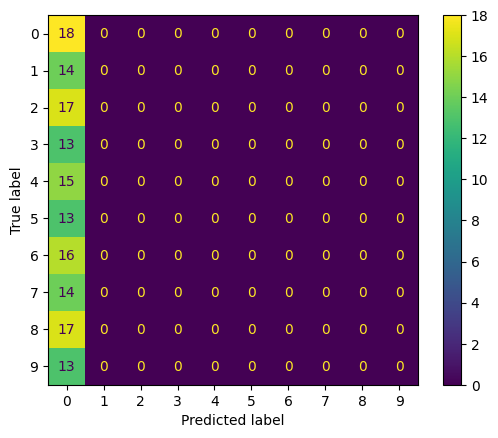

In [9]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<Axes: >

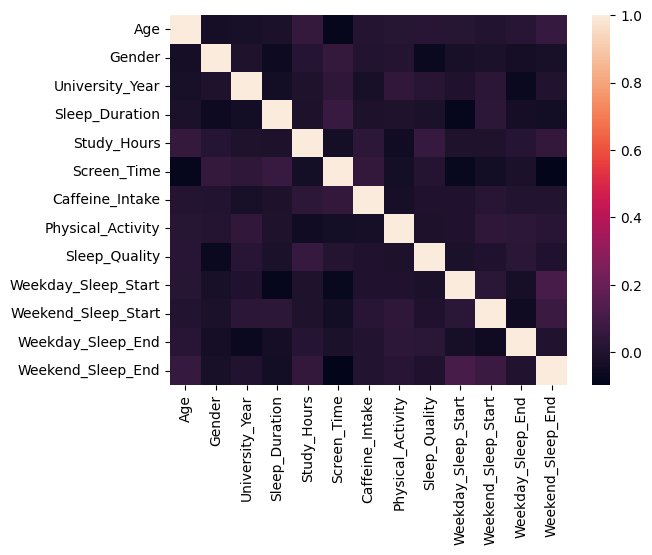

In [10]:
sns.heatmap(dataSleep.iloc[:,:13].corr())

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(x_test)

accuracy_score(y_test, y_pred)

0.10666666666666667

In [14]:
dataSleep.columns

Index(['Age', 'Gender', 'University_Year', 'Sleep_Duration', 'Study_Hours',
       'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality',
       'Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End',
       'Weekend_Sleep_End'],
      dtype='object')

In [15]:
dataSleep2 = dataSleep.drop(columns='Weekday_Sleep_Start')
dataSleep2 = dataSleep2.drop(columns='Weekend_Sleep_Start')
dataSleep2 = dataSleep2.drop(columns='Weekday_Sleep_End')
dataSleep2 = dataSleep2.drop(columns='Weekend_Sleep_End')
dataSleep2.head()


,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality
0,24,0,1,7.7,7.9,3.4,2,37,10
1,21,1,0,6.3,6.0,1.9,5,74,2
2,22,1,3,5.1,6.7,3.9,5,53,5
3,24,0,3,6.3,8.6,2.8,4,55,9
4,20,1,3,4.7,2.7,2.7,0,85,3


<Axes: >

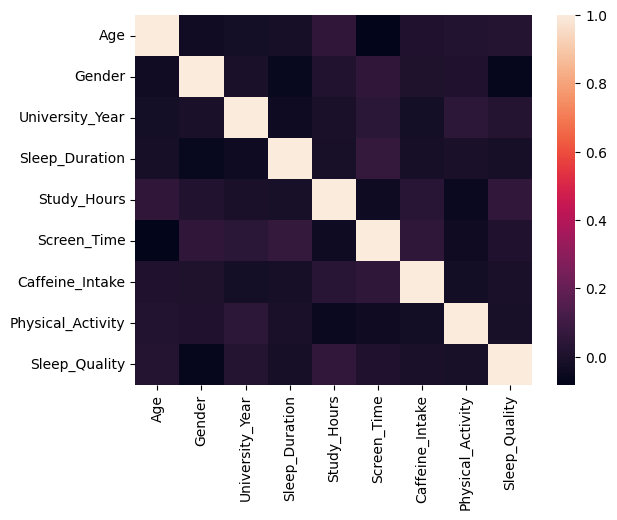

In [16]:
sns.heatmap(dataSleep2.corr())

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Se crea primero el objeto Standard Scaler
minmax_scaler = MinMaxScaler()

# Luego "entrenamos" con los datos para obtener los parámetros del escalamiento
minmax_scaler.fit(dataSleep2)

# Finalmente aplicamos el escalamiento
array_scaler_min_max = minmax_scaler.transform(dataSleep2)
df_minmax = pd.DataFrame(array_scaler_min_max)
df_minmax.columns = dataSleep2.columns
df_minmax

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality
0,0.857143,0.0,0.333333,0.74,0.655462,0.800000,0.4,0.308333,1.000000
1,0.428571,1.0,0.000000,0.46,0.495798,0.300000,1.0,0.616667,0.111111
2,0.571429,1.0,1.000000,0.22,0.554622,0.966667,1.0,0.441667,0.444444
3,0.857143,0.0,1.000000,0.46,0.714286,0.600000,0.8,0.458333,0.888889
4,0.285714,1.0,1.000000,0.14,0.218487,0.566667,0.0,0.708333,0.222222
...,...,...,...,...,...,...,...,...,...
495,0.857143,1.0,0.333333,0.22,0.773109,0.300000,0.8,0.916667,0.333333
496,0.285714,1.0,0.333333,0.98,0.638655,0.833333,0.6,0.333333,0.333333
497,0.428571,1.0,0.666667,0.34,0.529412,0.966667,0.2,0.566667,1.000000
498,0.000000,0.0,0.333333,0.18,0.033613,0.833333,0.0,0.100000,0.111111


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score,  classification_report
from sklearn.feature_selection import SelectKBest

In [22]:
X = df_minmax.drop(['Sleep_Quality'], axis=1)
y = df_minmax['Sleep_Quality']
best = SelectKBest(k=5)
X_new = best.fit_transform(X, y)
selected = best.get_support(indices=True)

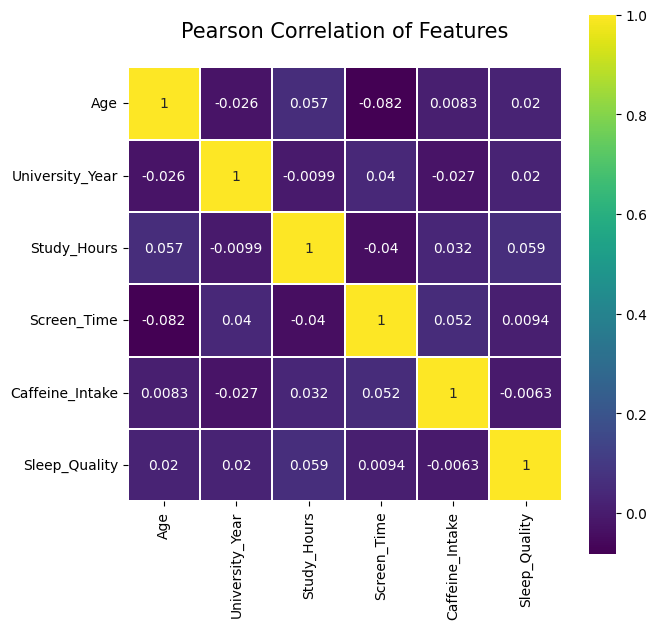

In [23]:
used_features = X.columns[selected]
features_corr = np.append(used_features, ['Sleep_Quality'])
colormap = plt.cm.viridis
plt.figure(figsize=(7,7))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_minmax[features_corr].astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()